In [53]:
import os
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from math import sqrt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_df = pd.read_csv('avg_intesities_data_saturated_1.csv', sep = ',')
values = x_df.values
#wl=x_df.columns.values
#print(wl.shape)

#print(values)
#print(type(values))
print(values.shape)
print(values[1].shape)
print(len(values))
x_df

(24, 2046)
(2046,)
24


,173.738600,173.868800,173.999000,174.129100,174.259300,174.389500,174.519700,174.649900,174.780100,174.910300,...,428.718100,428.828600,428.939000,429.049500,429.159900,429.270300,429.380600,429.491000,429.601300,429.711600
0,2799.146667,2729.746667,2798.666667,2810.173333,2846.493333,2820.720000,2832.746667,2811.493333,2870.666667,2766.533333,...,5650.866667,5988.066667,6857.133333,6540.866667,5799.026667,5557.360000,5451.240000,5407.986667,5390.133333,5428.360000
1,2659.481481,2592.703704,2654.148148,2670.888889,2708.055556,2672.703704,2684.092593,2669.166667,2723.166667,2625.333333,...,4047.129630,3970.648148,3998.148148,3988.333333,4000.462963,3993.925926,3921.648148,3900.092593,3879.481481,3910.000000
2,2905.645161,2833.193548,2902.548387,2915.322581,2952.645161,2921.096774,2933.612903,2913.709677,2974.064516,2875.161290,...,5714.193548,5605.935484,5578.645161,5572.548387,5620.193548,5630.129032,5564.838710,5547.548387,5526.322581,5537.935484
3,3036.771429,2960.457143,3033.314286,3045.514286,3083.657143,3059.542857,3071.800000,3051.200000,3109.514286,3008.171429,...,6461.228571,6388.685714,6346.485714,6331.942857,6351.971429,6343.257143,6299.828571,6283.142857,6252.000000,6253.200000
4,2715.571429,2645.571429,2710.571429,2729.678571,2762.035714,2734.500000,2742.892857,2721.357143,2783.357143,2681.928571,...,4664.571429,4567.142857,4537.071429,4540.535714,4600.178571,4612.071429,4554.107143,4523.142857,4486.928571,4517.678571
5,3246.576923,3174.000000,3245.923077,3259.500000,3308.038462,3271.230769,3293.923077,3273.153846,3329.269231,3230.576923,...,6959.538462,6887.423077,6903.576923,6867.615385,6895.346154,6859.923077,6784.500000,6769.576923,6760.038462,6762.576923
6,2851.750000,2781.562500,2844.500000,2860.000000,2901.281250,2870.843750,2881.562500,2863.031250,2918.687500,2828.875000,...,5043.843750,4981.968750,5003.781250,4991.125000,5014.343750,4987.906250,4923.562500,4902.218750,4878.625000,4902.468750
7,2738.032258,2662.741935,2726.870968,2741.806452,2774.322581,2741.677419,2756.451613,2740.870968,2789.548387,2694.612903,...,4585.032258,4491.516129,4464.161290,4476.612903,4534.354839,4532.612903,4470.935484,4448.354839,4427.516129,4448.096774
8,2920.000000,2850.677419,2920.322581,2931.129032,2976.161290,2942.322581,2951.677419,2939.483871,2988.483871,2896.677419,...,6016.387097,5944.709677,5903.161290,5908.290323,5947.064516,5938.419355,5883.129032,5866.322581,5832.032258,5853.677419
9,3078.534884,3008.139535,3077.627907,3086.418605,3138.627907,3101.488372,3119.441860,3108.581395,3161.209302,3065.069767,...,5944.813953,5853.883721,5811.348837,5814.511628,5856.930233,5870.255814,5787.000000,5756.930233,5729.046512,5748.930233


In [3]:
"""#This is just for visualizing the various plots of the samples

df = pd.read_csv('./data/040_A07_Zanardi_QS277us_200Hz_delay1us_exp1ms', sep = '\t')
df1=df.drop(columns=['Pixels'])
df1=df1.dropna(axis=1)
data=df1.values
wl= data[0]
print(wl)

for i in range(len(values)):
    plt.plot(wl, values[i])
    #plt.show() #comment this one to have unique plot instead of multiple ones
#range(len(dfs))
"""



"#This is just for visualizing the various plots of the samples\n\ndf = pd.read_csv('./data/040_A07_Zanardi_QS277us_200Hz_delay1us_exp1ms', sep = '\t')\ndf1=df.drop(columns=['Pixels'])\ndf1=df1.dropna(axis=1)\ndata=df1.values\nwl= data[0]\nprint(wl)\n\nfor i in range(len(values)):\n    plt.plot(wl, values[i])\n    #plt.show() #comment this one to have unique plot instead of multiple ones\n#range(len(dfs))\n"

In [4]:
df_y = pd.read_csv('concentration_1.csv', sep = ',')
print(type(df_y))
concentration=df_y.values
print(concentration.shape)
#print(concentration)
df_y

<class 'pandas.core.frame.DataFrame'>
(24, 9)


,Reference Number,Si,Fe,Mg,Cu,Zn,Mn,Al,Total
0,1,0.185,0.228,2.940,0.0304,0.0620,0.280,96.0000,99.7254
1,2,0.360,0.600,1.100,0.0700,0.2000,0.830,96.5787,99.7387
2,3,9.140,1.010,0.200,0.4200,3.6000,0.410,84.7770,99.5570
3,4,8.565,0.000,0.293,0.8870,2.6360,0.330,86.5650,99.2760
4,5,9.500,0.000,0.391,0.0000,0.0580,0.016,90.0210,99.9860
5,6,7.220,0.140,0.360,0.0840,0.1200,0.053,91.8090,99.7860
6,7,7.460,0.530,0.036,0.1400,0.1500,0.100,91.4140,99.8300
7,8,12.900,0.120,0.520,0.1550,0.5200,0.286,84.7905,99.2915
8,9,8.750,0.460,1.710,0.0290,2.0000,0.056,85.3100,98.3150
9,10,0.260,0.420,1.260,0.0200,0.0040,1.160,96.8346,99.9586


In [5]:
y_cu = concentration[:,3]
print(y_cu)
print(y_cu.shape)

[2.94  1.1   0.2   0.293 0.391 0.36  0.036 0.52  1.71  1.26  0.41  0.88
 0.32  0.025 0.77  4.54  0.57  0.39  3.57  0.339 0.363 2.48  1.11  2.03 ]
(24,)


In [6]:
y_df_cu= pd.DataFrame(y_cu)
#df_y_si

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_cu, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(19, 2046) (19, 1)
(5, 2046) (5, 1)


# Principal Components Analysis

In [8]:
n_components=10

x_df = pd.read_csv('avg_intesities_data_saturated_1.csv', sep = ',')
x = x_df.values
print(x.shape)
print(x[1].shape)
print(len(x))


# This has to be used later for regression, PCA is done on X only
"""
y_df = pd.read_csv('labels_aligned+.csv', sep = ',')
concentration=y_df.values
#print(concentration)
multi_y = concentration[:,2:]
#print (multi_y)
print (multi_y.shape)
multi_y= np.array(multi_y, dtype=np.float)
y=np.around(multi_y, decimals=4)
#print(y)
"""

# PCA

X_std = StandardScaler().fit_transform(x)
#print(X_std)

pca = PCA(n_components= n_components)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
print(principalComponents.shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#print(principalDf)


#print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
#print(pca.singular_values_)

(24, 2046)
(2046,)
24
(24, 10)
[83.43 95.78 98.32 99.17 99.44 99.61 99.73 99.83 99.9  99.93]


#### This is the *mathematical* way to do it

(2134.9565217391278+0j)
[83.43 95.78 98.32 99.17 99.45 99.62 99.74 99.83 99.9  99.93]


"# Make a list of (eigenvalue, eigenvector) tuples\neig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]\n\n# Sort the (eigenvalue, eigenvector) tuples from high to low\neig_pairs.sort(key=lambda x: x[0], reverse=True)\n\n# Visually confirm that the list is correctly sorted by decreasing eigenvalues\nprint('Eigenvalues in descending order:')\nfor i in eig_pairs[:20]: #only first 20 eigenvalues\n    print(i[0])\n"

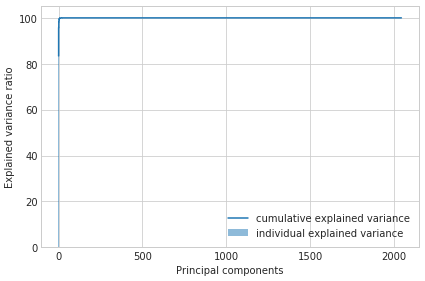

In [9]:
cov_mat = np.cov(X_std.T) #covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print(cum_var_exp.real)
print(np.round(cum_var_exp[:10].real, decimals=2)) # same as above but only first 10 elements

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2046), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(2046), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
'''# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs[:20]: #only first 20 eigenvalues
    print(i[0])
'''

# Linear Regression
this is ordinary least square regression

In [10]:
from sklearn import linear_model

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [11]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[ 0.77        0.82239701]
 [ 1.11        1.23019716]
 [ 2.94        5.09360663]
 [ 0.293      -0.28772585]
 [ 0.41        0.91924864]]


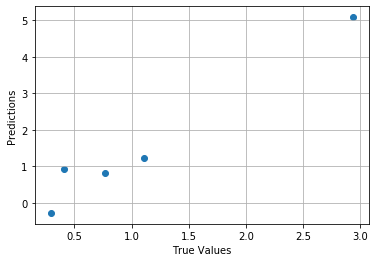

In [12]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

In [13]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  1.0248698457520173
R^2:  -0.13629796087820956


# Partial Least Square Regression

In [14]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    
    return
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
"""   
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    return
""" 

"   \n    # Fit a line to the CV vs response\n    z = np.polyfit(y, y_c, 1)\n    with plt.style.context(('ggplot')):\n        fig, ax = plt.subplots(figsize=(9, 5))\n        ax.scatter(y_c, y, c='red', edgecolors='k')\n        #Plot the best fit line\n        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)\n        #Plot the ideal 1:1 line\n        ax.plot(y, y, color='green', linewidth=1)\n        plt.title('$R^{2}$ (CV): '+str(score_cv))\n        plt.xlabel('Predicted $^{\\circ}$Brix')\n        plt.ylabel('Measured $^{\\circ}$Brix')\n        plt.show()\n    return\n"

## No preprocessing

100% completed
Suggested number of components:  3



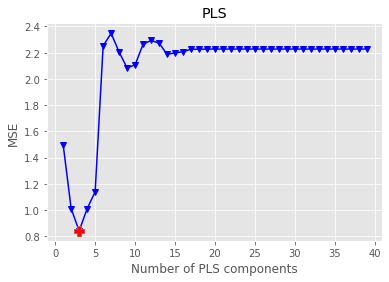

R2 calib: 0.763
R2 CV: 0.384
MSE calib: 0.324
MSE CV: 0.841


In [15]:
optimise_pls_cv(x_df, y_df_cu, 40, plot_components=True)

In [16]:
# Define PLS object
pls = PLSRegression(n_components=3)
# Fit
pls.fit(x_df, y_df_cu)
# Cross-validation
y_cv = cross_val_predict(pls, x_df, y_df_cu, cv=10)
# Calculate scores
score = r2_score(y_df_cu, y_cv)
mse = mean_squared_error(y_df_cu, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  0.3842323563231216
MSE:  0.8407833963387855


100% completed
Suggested number of components:  2



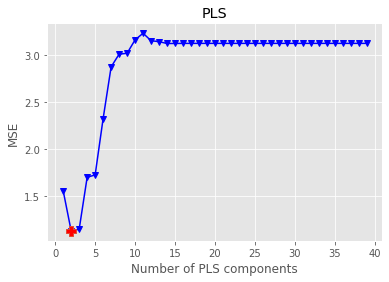

R2 calib: 0.706
R2 CV: 0.239
MSE calib: 0.436
MSE CV: 1.128


In [17]:
optimise_pls_cv(X_train,y_train, 40, plot_components=True)

In [18]:
# Define PLS object
pls = PLSRegression(n_components=3)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  0.22680190194870176
MSE:  1.1454811851019897


R2_pred:  0.5841788589330834
R2_cv:  0.22680190194870176

[real, predictions]
[[0.77       1.28240808]
 [1.11       1.20995325]
 [2.94       1.68412635]
 [0.293      0.14418983]
 [0.41       0.63348228]]


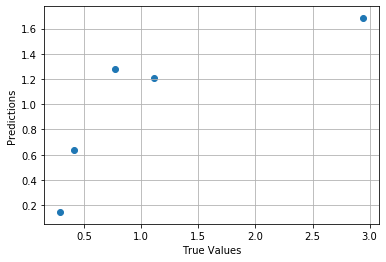

In [19]:
y_pred = pls.predict(X_test)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

## Using Savgol filter

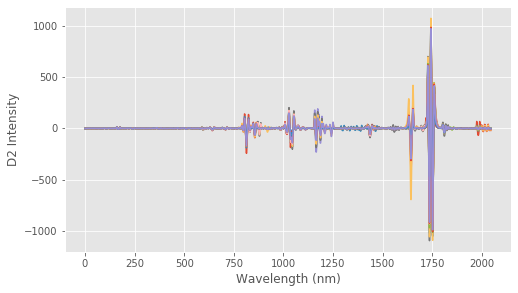

100% completed
Suggested number of components:  7



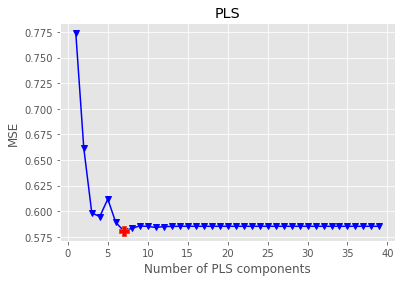

R2 calib: 0.999
R2 CV: 0.575
MSE calib: 0.001
MSE CV: 0.581


In [20]:
# Calculate second derivative
X2 = savgol_filter(x_df, 17, polyorder = 2,deriv=2) # Is this useful with LIBS spectra???
# Plot second derivative
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(range(len(X2.T)), X2.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Intensity')
    plt.show()
    
optimise_pls_cv(X2, y_df_cu, 40, plot_components=True)

100% completed
Suggested number of components:  3



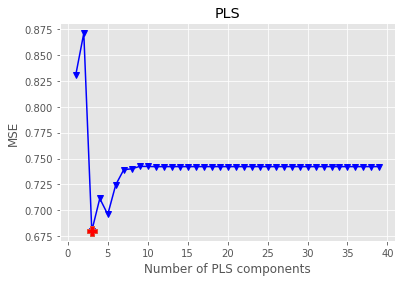

R2 calib: 0.933
R2 CV: 0.541
MSE calib: 0.099
MSE CV: 0.680


In [21]:
X2_train = savgol_filter(X_train, 17, polyorder = 2,deriv=2) 
X2_test = savgol_filter(X_test, 17, polyorder = 2,deriv=2) 

optimise_pls_cv(X2_train, y_train, 40, plot_components=True)

In [49]:
# Define PLS object
pls = PLSRegression(n_components=7)
# Fit
pls.fit(X2_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X2_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R2_cv: ", score)
print("MSE: ", mse)




R2_cv:  0.5010832521870399
MSE:  0.739137549603884


R2_pred:  0.818492727162711
R2_cv:  0.5010832521870399

[real, predictions]
[[ 0.77        1.10480147]
 [ 1.11        1.43117484]
 [ 2.94        2.52938887]
 [ 0.293      -0.03290065]
 [ 0.41        1.00062689]]


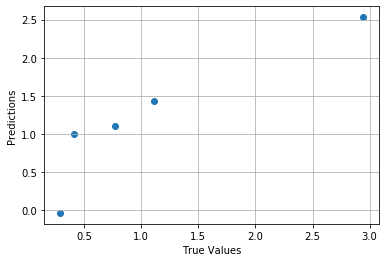

In [48]:
y_pred = pls.predict(X2_test)

# Cross-validation
y_cv = cross_val_predict(pls, X2_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

## Using Normalization

In [24]:
Xn_train = normalize(X_train, axis=1)
Xn_test = normalize(X_test, axis=1)

100% completed
Suggested number of components:  2



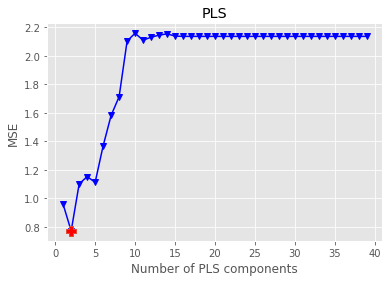

R2 calib: 0.750
R2 CV: 0.479
MSE calib: 0.370
MSE CV: 0.772


In [25]:
optimise_pls_cv(Xn_train,y_train, 40, plot_components=True)

In [56]:
# Define PLS object
pls = PLSRegression(n_components=2)
# Fit
pls.fit(Xn_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, Xn_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

R^2:  0.4788274282570033
MSE:  0.7721092131853793


R2_pred:  0.31080414382065236
R2_cv:  0.4788274282570033

[real, predictions]
[[0.77       1.44475054]
 [1.11       1.11932368]
 [2.94       1.3018759 ]
 [0.293      0.50866921]
 [0.41       0.40597643]]


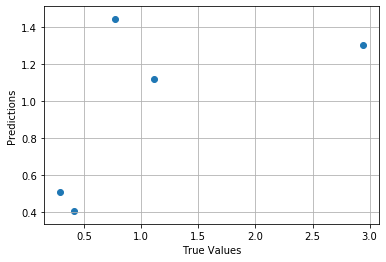

In [51]:
y_pred = pls.predict(Xn_test)

# Cross-validation
y_cv = cross_val_predict(pls, Xn_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print("R2_pred: ", score_pred)
print("R2_cv: ",score_cv)
print("")

b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [29]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [30]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:1.00, MSE:0.57, RMSE:0.76
Alpha:0.0010, R2:1.00, MSE:0.57, RMSE:0.76
Alpha:0.0100, R2:1.00, MSE:0.56, RMSE:0.75
Alpha:0.1000, R2:1.00, MSE:0.62, RMSE:0.78
Alpha:0.3000, R2:1.00, MSE:0.87, RMSE:0.93
Alpha:0.5000, R2:1.00, MSE:1.18, RMSE:1.09
Alpha:0.7000, R2:1.00, MSE:1.26, RMSE:1.12
Alpha:1.0000, R2:1.00, MSE:1.12, RMSE:1.06


In [31]:
model = ElasticNet(alpha=0.01).fit(X_train,y_train)   
score = model.score(X_train, y_train)
print("Train score: ", score)
pred_y = model.predict(X_test)


rmse = sqrt(mean_squared_error(y_test, pred_y))
r2 = r2_score(y_test, pred_y)
print("RMSE: ", rmse)
print("R^2: ", r2)

Train score:  0.99999798130672
RMSE:  0.7503605483701761
R^2:  0.3908913303783311


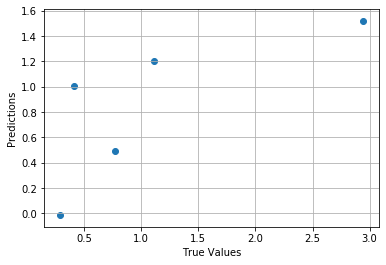

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Random Forest

In [33]:
y_test=np.ravel(y_test)
print(y_test.shape)
y_train=np.ravel(y_train)
print(y_train.shape)

(5,)
(19,)


In [34]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
# Train the model on training data
#rf.fit(X_train, y_train);

rf.fit(X2_train, y_train);

In [35]:
# Use the forest's predict method on the test data

#predictions = rf.predict(X_test)
predictions = rf.predict(X2_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.33


In [36]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  0.388934459830815
R^2:  0.836353152305245


In [37]:
y_test= y_test.reshape((len(y_test), 1))
print(y_test.shape)
print(type(y_test))
predictions=predictions.reshape((len(y_test), 1))
print(predictions.shape)
print(type(y_test))
#print((y_test, predictions))

(5, 1)
<class 'numpy.ndarray'>
(5, 1)
<class 'numpy.ndarray'>


In [38]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[0.77       0.99920167]
 [1.11       1.1101    ]
 [2.94       2.34704833]
 [0.293      0.60885167]
 [0.41       0.91245667]]


Text(0, 0.5, 'Predictions')

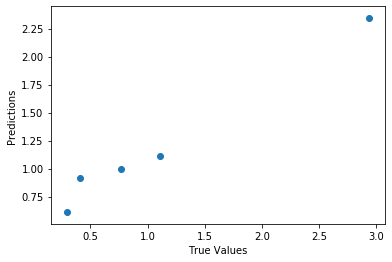

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [40]:
#I don't remember what's this

#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

In [41]:
c

NameError: name 'c' is not defined

# MultiOutput Random Forest

In [ ]:
multi_y = concentration[:,1:-2]
print (multi_y.shape)
print (type(multi_y))
df_y= pd.DataFrame(multi_y)
print (type(df_y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=650,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)


In [ ]:
y_multirf = regr_multirf.predict(X_test)

In [ ]:
print(y_test.shape)
print(y_multirf.shape)

In [ ]:
rmse = sqrt(mean_squared_error(y_test, y_multirf))
r2 = r2_score(y_test, y_multirf)

print("R^2: ", r2)
print("RMSE: ", rmse)

In [ ]:
b=np.append(np.around(y_test,3), np.around(y_multirf,3), axis=1)

print("[real, predictions]")
print(b)

In [ ]:
plt.scatter(y_test, y_multirf)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
print(y_test[0]shape)
print(y_multirf[0].T.shape)

In [ ]:
y_pred=np.around(y_multirf,2)
y_pred[:,0]

In [ ]:
y_test[0].values

In [ ]:
print("real: ", y_test[0].values)
print("pred: ", y_pred[:,0])

# PLS-2

In [ ]:
optimise_pls_cv(X_train, y_train, 40, plot_components=True)

In [ ]:
# Define PLS object
pls = PLSRegression(n_components=6)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("R^2: ", score)
print("MSE: ", mse)

In [ ]:
y_pred = pls.predict(X_test)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print(score_pred) #NAMMERDA
print(score_cv)

In [ ]:
pd.DataFrame(np.round(y_pred, decimals=2))

In [ ]:
np.round(y_test, decimals=2)